# First-Cut Run 68 $\gamma$ and Neutron Direct Backgrounds

My notebook N-MISC-18-003 shows (pgs 67) simulations that were started to assess the direct gamma and neutron backgrounds for a Pu/Be source running in the K100 Run 68 setup. Specifically testing out the .h5 files created using the scripts mentioned on pg 52 of the above notebook reference. 

In [1]:
#play around with some hits data stored in h5 file
#===============to suppress h5py warning see:
#https://github.com/h5py/h5py/issues/961
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
warnings.resetwarnings()
f = h5py.File("/data/chocula/villaa/k100Sim_Data/captureCalhdf5/Run68_gdirect_bknd_R68_PuBe_0x0006_1551197784.h5","r")

for i in f:
    print(i)

hits = f['geant4/hits']

geant4


In [2]:
import numpy as np
print(np.shape(hits))
print(hits[0,:])

(1838004, 22)
[ 8.20000000e+01  1.00000000e+03  1.00118000e+05  0.00000000e+00
  2.11200000e+03  3.00721013e-08  0.00000000e+00  6.60568498e-03
  5.19294799e-03 -7.57669727e-03 -2.64559290e+02 -3.98541790e+02
  6.19032837e+02  3.48247508e+06  6.44645682e-03  1.65848813e-03
  3.49313911e-03 -2.79400000e+02 -4.02359879e+02  6.10991107e+02
  3.47526002e+06  0.00000000e+00]


In [3]:
#try to label events with consecutive and unique labels
ev = hits[:,0]

diffs = np.append(np.diff(ev),1)
diff_divide = np.copy(diffs)
diff_divide[diff_divide==0] = 1 #replace some elements with unity
diffs = diffs/diff_divide
#print(diffs[0:300])
#print(diff_divide[0:300])

newev = np.cumsum(diffs)
print(newev[0:300])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 9. 9. 9.
 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]


In [4]:
#select the poly block
cPoly = np.zeros(np.shape(hits)[0],dtype=bool)


cPoly[(hits[:,1]==1000)] = True
print(np.sum(cPoly))
print(np.shape(cPoly))
print(np.shape(hits))

1818616
(1838004,)
(1838004, 22)


In [5]:
#reminder of file structure
#EV  DT  TS  P Type  E1  D3  PX3 PY3 PZ3 X3  Y3  Z3  time3 PX1 PY1 PZ1 X1  Y1  Z1  time1 nCap
#python index below
#0    1   2 3   4     5   6   7   8   9  10  11  12    13   14  15  16 17  18  19   20    21

In [6]:
#I want to find the edges in Y because those are the places the poly surfaces that I'm interested in are.
#I can do that by a histogram

#first some hit-level cuts
cHVDet = np.zeros(np.shape(hits)[0],dtype=bool)
cZeroEdep = np.zeros(np.shape(hits)[0],dtype=bool)
cNeutron = np.zeros(np.shape(hits)[0],dtype=bool)
cGamma = np.zeros(np.shape(hits)[0],dtype=bool)
cPY3neg = np.zeros(np.shape(hits)[0],dtype=bool)
cWestYPolyEdge = np.zeros(np.shape(hits)[0],dtype=bool)

cHVDet[hits[:,1]==1] = True
cZeroEdep[hits[:,6]==0] = True
cNeutron[hits[:,4]==2112] = True
cGamma[hits[:,4]==22] = True
cPY3neg[hits[:,8]<0] = True #going in y direction away from barrel source
cWestYPolyEdge[hits[:,11]==330.2] = True #right at the West poly edge closest to cryostat

#now some event-level cuts
evWithHVhits = newev[cHVDet & ~cZeroEdep]
cWithHVHits = np.isin(newev,evWithHVhits)
print(np.sum(cWithHVHits))
print(np.shape(np.unique(evWithHVhits)))

finalypos_n = hits[:,11]
finalypos_n = finalypos_n[cZeroEdep & cNeutron & cPY3neg & cPoly]/1000 # get things in meters instead of mm
finalypos_g = hits[:,11]
finalypos_g = finalypos_g[cZeroEdep & cGamma & cPY3neg & cPoly]/1000 # get things in meters instead of mm
print(np.shape(finalypos_g))
print(finalypos_g[0:100])

466
(15,)
(50817,)
[-0.47438282 -0.50643896 -0.4954611  -0.49903133  0.45708947 -0.45396345
 -0.5334      0.49347515  0.45448848  0.47546527  0.38772645  0.33423943
  0.3302      0.33308663  0.3302     -0.5334      0.49069042  0.35145572
  0.33023345  0.3302      0.52232769  0.44291705  0.45536099  0.44048884
  0.44876431  0.48115791  0.50754703  0.33629213  0.3302      0.44245148
  0.43353649  0.44867118  0.33519014  0.3302      0.43743384  0.49351532
  0.4906035   0.46398769  0.47298588  0.45496309  0.4705948   0.46882274
  0.43468488 -0.42993826 -0.36065156 -0.37881353 -0.38528145 -0.44954505
 -0.50463259 -0.485467   -0.49006492  0.52362     0.51865397  0.3352178
  0.3302     -0.5334      0.3302      0.420087    0.3302     -0.5334
  0.43343737  0.3302     -0.34117272 -0.35432351 -0.35006484 -0.37133432
 -0.48906881 -0.48059413 -0.50516872 -0.49276062 -0.462637   -0.47044834
  0.52765049  0.48260039  0.41675194  0.41407206  0.3302      0.5015378
  0.36904253  0.3302     -0.33045701  

In [7]:
ymax = 1
n_n,nx_n = np.histogram(finalypos_n,1000,range=(-ymax,+ymax))
n_g,nx_g = np.histogram(finalypos_g,1000,range=(-ymax,+ymax))

xc = (nx_n[:-1] + nx_n[1:]) / 2

In [8]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

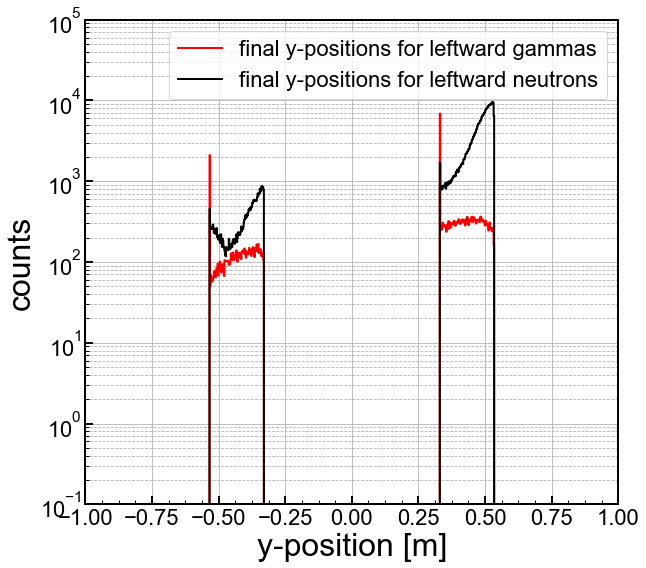

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

ax1.step(xc,n_g, where='mid',color='r', linestyle='-', \
         label='final y-positions for leftward gammas', linewidth=2)
ax1.step(xc,n_n, where='mid',color='k', linestyle='-', \
         label='final y-positions for leftward neutrons', linewidth=2)




#tlabel = 'Thresh. {0} eV$_{{\mathrm{{ee}}}}$'.format(18)
#ax1.axvline(thresh, color='k', linestyle='--', lw=2, alpha=0.8,label=tlabel)
#erange_x = np.arange(thresh-sigthr, thresh+sigthr, 0.01)
#ax1.fill_between(erange_x, ymin, ymax, facecolor='r', alpha=0.3)

ax1.set_yscale('log')
ax1.set_xlim(-ymax, ymax) #in pairs
ax1.set_ylim(0.1,1e5)
ax1.set_xlabel('y-position [m]',**axis_font)
ax1.set_ylabel('counts',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/R68_ypos_polycrossings.png')
plt.show()

In [10]:
yc = 0.33 #33 cm center
ydiff = 0.01 #+/-1cm window
zn_n,znx_n = np.histogram(finalypos_n,1000,range=(yc-ydiff,yc+ydiff))
zn_g,znx_g = np.histogram(finalypos_g,1000,range=(yc-ydiff,yc+ydiff))

zxc = (znx_n[:-1] + znx_n[1:]) / 2

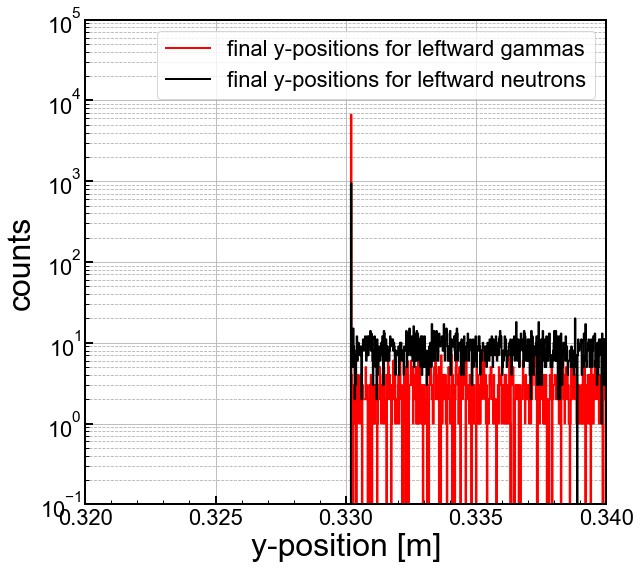

In [11]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

ax1.step(zxc,zn_g, where='mid',color='r', linestyle='-', \
         label='final y-positions for leftward gammas', linewidth=2)
ax1.step(zxc,zn_n, where='mid',color='k', linestyle='-', \
         label='final y-positions for leftward neutrons', linewidth=2)




#tlabel = 'Thresh. {0} eV$_{{\mathrm{{ee}}}}$'.format(18)
#ax1.axvline(thresh, color='k', linestyle='--', lw=2, alpha=0.8,label=tlabel)
#erange_x = np.arange(thresh-sigthr, thresh+sigthr, 0.01)
#ax1.fill_between(erange_x, ymin, ymax, facecolor='r', alpha=0.3)

ax1.set_yscale('log')
ax1.set_xlim(yc-ydiff, yc+ydiff) #in pairs
ax1.set_ylim(0.1,1e5)
ax1.set_xlabel('y-position [m]',**axis_font)
ax1.set_ylabel('counts',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/R68_ypos_polycrossings_zoom.png')
plt.show()

In [12]:
#try to figure out probability of a HVdet-event having passed through the Y-surface of the poly
prim = 1000000 #I know this externally, would be great if this were in the simulation. 
evHV = np.shape(np.unique(evWithHVhits))[0]

print('Out of: {} primaries'.format(prim))
print('there were: {} HV events'.format(evHV))

Out of: 1000000 primaries
there were: 15 HV events


In [13]:
TSofHVevents = (hits[cWithHVHits & cHVDet,2]-hits[cWithHVHits & cHVDet,2]%100000)/100000
TypeofHVevents = hits[cWithHVHits & cHVDet,4]
evofHVevents = newev[cWithHVHits & cHVDet]

#cut down hits to submatrix
ev_WithHVHits = hits[cWithHVHits & cHVDet,:]
ev_WithHVHits[:,2] = TSofHVevents
ev_WithHVHits[:,0] = evofHVevents
event_track = np.unique(ev_WithHVHits[:,(0,2)],axis=0) #array with unique event-track pairs from events 

print(np.shape(ev_WithHVHits))


(66, 22)


In [22]:
#the hell with it it's easier to make a flux map
TSofPolyWallHits = (hits[cPoly & cZeroEdep & cPY3neg & cWestYPolyEdge,2] -hits[cPoly & cZeroEdep & cPY3neg & cWestYPolyEdge,2]%100000)/100000
polyWallHits = hits[cPoly & cZeroEdep & cPY3neg & cWestYPolyEdge,:]
evofPolyWallHits = newev[cPoly & cZeroEdep & cPY3neg & cWestYPolyEdge]
polyWallHits[:,2] = TSofPolyWallHits
polyWallHits[:,0] = evofPolyWallHits
polyWallHits_xz = polyWallHits[:,(10,12)]
print(np.shape(polyWallHits_xz))

poly_event_track = np.unique(polyWallHits[:,(0,2)],axis=0) #array with unique event-track pairs from events 

tracksinpoly = np.isin(event_track[:,0]*event_track[:,1],poly_event_track[:,0]*poly_event_track[:,1])
print(np.shape(tracksinpoly))
print(np.sum(tracksinpoly))
print(np.shape(event_track))

print(evofPolyWallHits)
#cHVDet[hits[:,1]==1] = True
#cZeroEdep[hits[:,6]==0] = True
#cNeutron[hits[:,4]==2112] = True
#cGamma[hits[:,4]==22] = True
#cPY3neg[hits[:,8]<0] = True #going in y direction away from barrel source
#cWestYPolyEdge[

(8363, 2)
(33,)
2
(33, 2)
[1.1000e+01 1.3000e+01 1.9000e+01 ... 3.4111e+04 3.4121e+04 3.4124e+04]


In [ ]:
#now try to see which of the tracks from the HVdet from events with hits in the HVdet are represented in the outgoing
#west poly sample

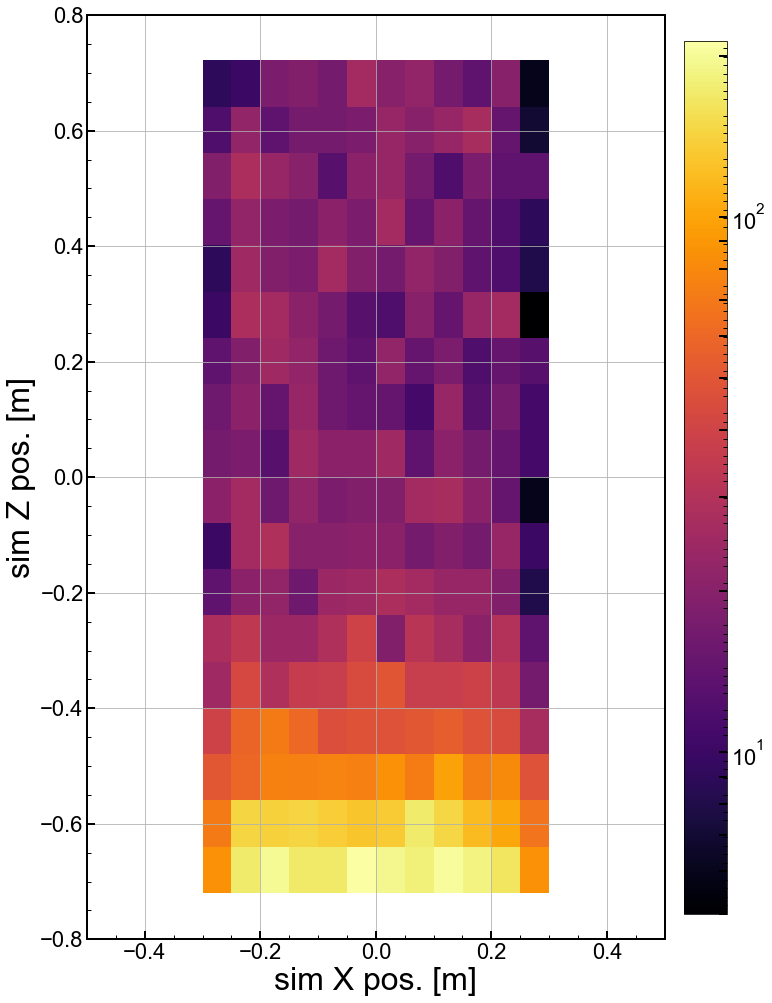

In [15]:
#set up a 2-d plot

fig,axes = plt.subplots(1,1,figsize=(17.0,17.0),frameon=False)
ax1 = axes

#need to play with axis
mpl.rcParams['ytick.minor.visible'] = False

xmin = -0.5
xmax = 0.5
zmin = -0.8
zmax = 0.8


h = ax1.hist2d(polyWallHits_xz[:,0]/1000,polyWallHits_xz[:,1]/1000, bins=20, cmap='inferno', \
               range=np.array([(xmin, xmax), (zmin,zmax)]),norm=mpl.colors.LogNorm())




#ax1.set_yscale('linear')
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(zmin,zmax)
ax1.set_xlabel('sim X pos. [m]',**axis_font) 
ax1.set_ylabel('sim Z pos. [m]',**axis_font)
#ax1.set_zlabel('sim Z pos. [m]',labelpad=20,**axis_font)
ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
#equal aspect ratio:
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_aspect.html
ax1.set_aspect('equal')

#lgnd= ax1.legend(loc=2,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

#plt.tight_layout()
clrbr=plt.colorbar(h[3],fraction=0.046,pad=0.02)
#plt.savefig('figures/figure.png')
fig.savefig('figures/R68_PolyWestInFlux.png', bbox_inches='tight') #needed to get colorbar in figure
plt.show()